In [1]:
%matplotlib inline
from utils import *
from tqdm import *
from os.path import join
from matplotlib import pyplot as plt
from skimage.measure import block_reduce
from multiprocessing import Pool
import numpy as np
import librosa

In [2]:
data_root = 'drumData'
n_fft = 1024
hop_length = n_fft/4
use_logamp = False # boost the brightness of quiet sounds
reduce_rows = 10 # how many frequency bands to average into one
reduce_cols = 1 # how many time steps to average into one
crop_rows = 32 # limit how many frequency bands to use
crop_cols = 32 # limit how many time steps to use
limit = None # set this to 100 to only process 100 samples

In [3]:
drumNames = ["kick", "tom", "snare", "clap", "hi.hat", "ride", "crash"]
drumFingerPrints = {}
drumSamples = {}
for d in drumNames:
    %time drumSamples[d] = np.load(join(data_root, d+'_samples.npy'))

CPU times: user 1.19 ms, sys: 153 ms, total: 154 ms
Wall time: 266 ms
CPU times: user 1.17 ms, sys: 13.9 ms, total: 15.1 ms
Wall time: 14.6 ms
CPU times: user 788 µs, sys: 67.4 ms, total: 68.2 ms
Wall time: 67.9 ms
CPU times: user 693 µs, sys: 36 ms, total: 36.7 ms
Wall time: 36.5 ms
CPU times: user 940 µs, sys: 5.75 ms, total: 6.69 ms
Wall time: 6.38 ms
CPU times: user 754 µs, sys: 6.91 ms, total: 7.67 ms
Wall time: 7.37 ms
CPU times: user 645 µs, sys: 18 ms, total: 18.6 ms
Wall time: 18.3 ms


In [4]:
print (len(drumSamples))

7


In [5]:
crashes = drumSamples["crash"]

In [6]:
print (crashes.shape)

(723, 12000)


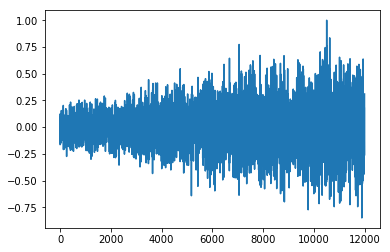

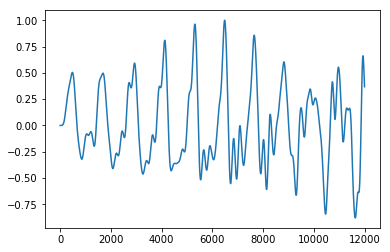

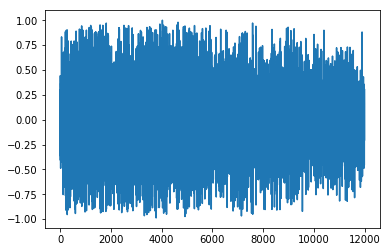

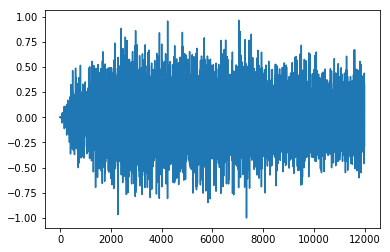

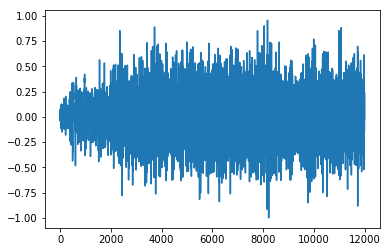

In [7]:
for i in range(5):
    plt.figure()
    plt.plot(crashes[i])

In [10]:
sr = 48000
centroid = librosa.feature.spectral_centroid(y=crashes[0], sr=sr)
print(centroid.shape)
print (centroid)

(1, 24)
[[ 5560.3171489   5629.03671452  5609.89366011  5480.05989929
   5461.11924961  5522.54792724  5601.8173304   5688.41870227
   5672.18189907  5577.99522852  5587.84196272  5660.06404195
   5669.32000279  5755.93204574  5722.79632946  5652.2391261   5634.08970281
   5563.79576087  5577.59888541  5505.20179951  5540.6803095   5539.15722191
   5604.99548003  5555.01562988]]


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from time import time
from utils import *
from os.path import join
from multiprocessing import Pool
import numpy as np
import itertools
import time as timeMod
from time import mktime
from datetime import datetime
import scipy.spatial
import scipy.spatial.distance as dist 
import python_speech_features as psf
import pickle
from skimage.measure import block_reduce

In [2]:
data_root = 'drumData/'
sr = 48000 # this is the samplerate initially used to load the samples
drumNames = pickle.load(open(data_root+'drumNames.pickle'))
drumLengths = pickle.load(open(data_root+'drumLengths.pickle'))
drumMFCCs = {}
for d in drumNames:
    %time drumSamples[d] = np.load(join(data_root, d+'_samples.npy'))
n_fft = 1024
hop_length = n_fft/4
use_logamp = False # boost the brightness of quiet sounds
reduce_rows = 10 # how many frequency bands to average into one
reduce_cols = 1 # how many time steps to average into one
crop_rows = 32 # limit how many frequency bands to use
crop_cols = 32 # limit how many time steps to use
limit = None # set this to 100 to only process 100 samples

IOError: [Errno 2] No such file or directory: 'drumData/drumNames.pickle'